In [1]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


print("scikit-learn version:", sklearn.__version__)     # 1.6.1
print("pandas version:", pd.__version__)            # 2.2.3
print("seaborn version:", sns.__version__)          # 0.13.2

scikit-learn version: 1.6.1
pandas version: 2.2.3
seaborn version: 0.13.2


In [2]:
sales_data= pd.read_csv("sales_strollers_01012023_01012025_new.csv", encoding="utf-8", delimiter=";")
sales_data.sample(5)

,Customer,Product Description,Document Date,Document Type,Document No,Product Group,Product,Quantity,Quantity Unit,Quantity Base,Unit Price,Line Amount,Document Currency,Line Amount In Base Currency,Sales Order,Sales Person,Customer Sales Person,Sales Person Group Name
14987,NO LIMITS SHPK,Twin stroller Happy 2 Black 2023,30.9.2024,Invoice,3710072488,100104: Bebeshki kolichki za bliznatsi,31001040012,4,pcs,4,"141,89474","539,2",EUR,"1054,58",042:1710158077 - Porachka ot klient bez DDS,SEVIM ALIEVA MUSTAFOVA - PETROVA,SEVIM ALIEVA MUSTAFOVA - PETROVA,Външен пазар
18605,SANTORO TIZIANA,Pushchair Beetle Grey 2023,1.12.2023,Invoice,3710062741,100103: Bebeshki letni kolichki,31001030173,1,pcs,1,"38,42","38,42",EUR,"75,14",042:1710135382 - Porachka ot klient bez DDS,FRANCESCO SAVERIO,FRANCESCO SAVERIO,Външен пазар
7509,HIPOLEND AD,Pushchair Alexa Black,28.2.2024,Invoice,3710065459,100103: Bebeshki letni kolichki,31001030179,1,pcs,1,"107,79","107,79",BGN,"107,79",041:1710143497 - Porachka ot klient,SABIHA KOTALAK,SABIHA KOTALAK,Пловдив
5822,G.N MOUSTAKAS SA,Pushchair Beetle Beige 2023,4.12.2024,Invoice,3710074878,100103: Bebeshki letni kolichki,31001030174,6,pcs,6,"38,7457","225,5",EUR,"441,04",042:1710159261 - Porachka ot klient bez DDS,ELENA GYULEVA,VASSILIS GIOTIS,Външен пазар
16201,PANAGIOTIDIS IOANNIS MON IKE,Pushchair Beetle Black 2023,30.4.2024,Invoice,3710067596,100103: Bebeshki letni kolichki,31001030172,1,pcs,1,"40,04","40,04",EUR,"78,31",042:1710147960 - Porachka ot klient bez DDS,ELENA GYULEVA,VASSILIS GIOTIS,Външен пазар


In [3]:
print(sales_data.columns.to_list())

['Customer', 'Product Description', 'Document Date', 'Document Type', 'Document No', 'Product Group', 'Product', 'Quantity', 'Quantity Unit', 'Quantity Base', 'Unit Price', 'Line Amount', 'Document Currency', 'Line Amount In Base Currency', 'Sales Order', 'Sales Person', 'Customer Sales Person', 'Sales Person Group Name']


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22251 entries, 0 to 22250
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Customer                      22251 non-null  object
 1   Product Description           22251 non-null  object
 2   Document Date                 22251 non-null  object
 3   Document Type                 22251 non-null  object
 4   Document No                   22251 non-null  int64 
 5   Product Group                 22251 non-null  object
 6   Product                       22251 non-null  int64 
 7   Quantity                      22251 non-null  int64 
 8   Quantity Unit                 22251 non-null  object
 9   Quantity Base                 22251 non-null  int64 
 10  Unit Price                    22251 non-null  object
 11  Line Amount                   22251 non-null  object
 12  Document Currency             22251 non-null  object
 13  Line Amount In B

In [5]:
sales_data['Document Date'] = pd.to_datetime(
    sales_data['Document Date'],
    format='%d.%m.%Y',     # day.month.year format
    errors='coerce'
)

In [6]:
sales_data['Document Date'].head(5)

0   2024-10-29
1   2024-06-18
2   2024-03-26
3   2024-06-18
4   2024-04-23
Name: Document Date, dtype: datetime64[ns]

In [7]:
sales_data['Document Date'].isna().sum()

np.int64(0)

In [8]:
cols_to_clean = ['Unit Price', 'Line Amount', 'Line Amount In Base Currency']

for col in cols_to_clean:
    sales_data[col] = sales_data[col].str.replace(',', '.', regex=False)
    sales_data[col] = sales_data[col].astype(float)

In [9]:
sales_data[cols_to_clean].dtypes

Unit Price                      float64
Line Amount                     float64
Line Amount In Base Currency    float64
dtype: object

In [10]:
sales_data['Product'] = sales_data['Product'].astype(str)

In [11]:
sales_data['Product'].info

<bound method Series.info of 0        31001030204
1        31001030146
2        31001030146
3        31001030146
4        31001030146
            ...     
22246    31001030155
22247    31001030107
22248    31001030148
22249    31001030146
22250    31001030147
Name: Product, Length: 22251, dtype: object>

In [12]:
sales_data = sales_data[sales_data['Document Type'] == 'Invoice'].reset_index(drop=True)

In [13]:
sales_data['Document Type'].unique()

array(['Invoice'], dtype=object)

In [14]:
sales_data['Month'] = sales_data['Document Date'].dt.to_period('M').dt.to_timestamp()

monthly_sales = sales_data.groupby(['Product', 'Month'])['Quantity'].sum().reset_index()


In [15]:
monthly_sales.head()

,Product,Month,Quantity
0,31001010007,2024-12-01,2
1,31001010045,2024-12-01,1
2,31001010055,2023-01-01,5
3,31001010055,2023-02-01,2
4,31001010055,2024-12-01,1


In [16]:
sales_data['Revenue'] = sales_data['Line Amount In Base Currency']

In [17]:
monthly_sales = sales_data.groupby(['Product', 'Month']).agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

In [18]:
monthly_sales.head()

,Product,Month,Quantity,Revenue
0,31001010007,2024-12-01,2,623.88
1,31001010045,2024-12-01,1,250.00
2,31001010055,2023-01-01,5,1125.04
3,31001010055,2023-02-01,2,435.88
4,31001010055,2024-12-01,1,201.36


<Axes: title={'center': 'Total Units Sold Per Month'}, xlabel='Month'>

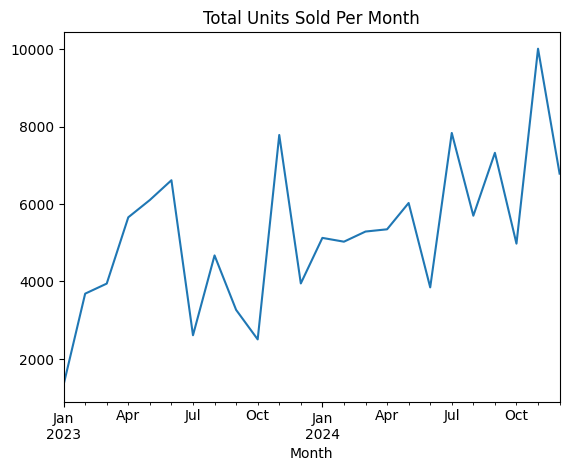

In [19]:
monthly_totals = monthly_sales.groupby('Month').agg({'Quantity': 'sum', 'Revenue': 'sum'}).reset_index()

monthly_totals.plot(x='Month', y='Quantity', title='Total Units Sold Per Month', legend=False)

<Axes: title={'center': 'Total Revenue Per Month'}, xlabel='Month'>

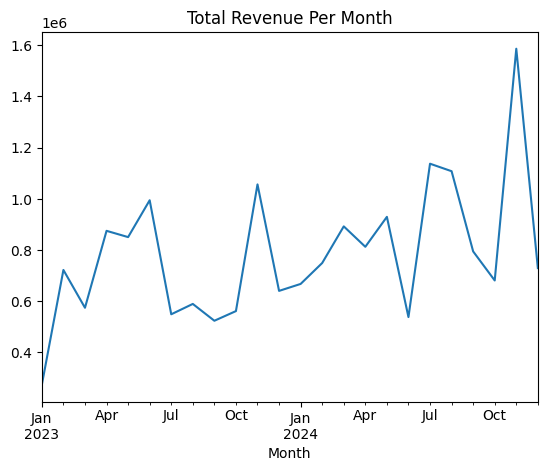

In [20]:
monthly_totals.plot(x='Month', y='Revenue', title='Total Revenue Per Month', legend=False)


<Axes: title={'center': 'Monthly Sales of Top 5 Products'}, xlabel='Month'>

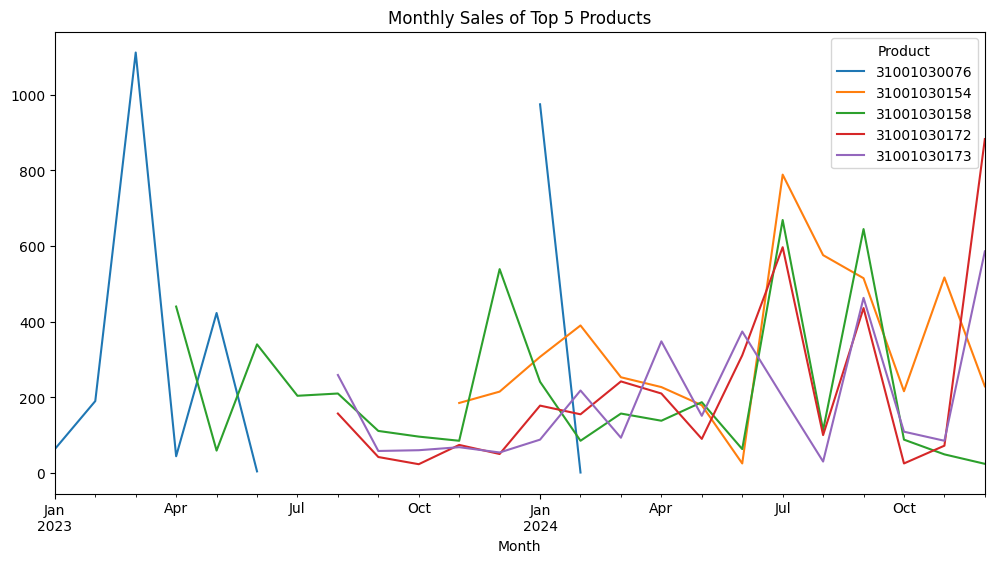

In [21]:
top_products = monthly_sales.groupby('Product')['Quantity'].sum().nlargest(5).index

monthly_sales[monthly_sales['Product'].isin(top_products)].pivot(index='Month', columns='Product', values='Quantity').plot(
    title='Monthly Sales of Top 5 Products', figsize=(12,6)
)


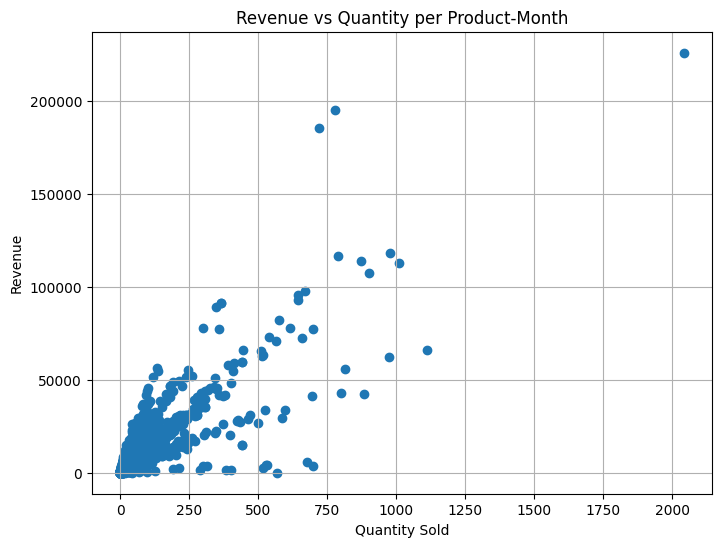

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(monthly_sales['Quantity'], monthly_sales['Revenue'])
plt.xlabel('Quantity Sold')
plt.ylabel('Revenue')
plt.title('Revenue vs Quantity per Product-Month')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Distribution of Monthly Quantities per Product')

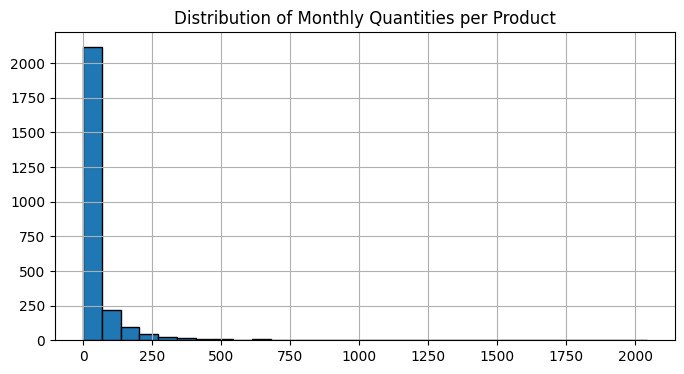

In [23]:
monthly_sales['Quantity'].hist(bins=30, figsize=(8,4), edgecolor='black')
plt.title('Distribution of Monthly Quantities per Product')


In [24]:
products_df = pd.read_csv('products_data.csv', encoding="utf-8", delimiter=";")
products_df.columns

Index(['Код на продукт Кика Груп Баркод', 'Баркод Кика', 'Part Number',
       'Aktiven za Web', 'Aktiven za Web B2C', 'Product Name', 'Short Name',
       'Measurement Unit', 'Broy v kashon', 'Shirina', 'Visochina', 'Dalzhina',
       'Drug razmer', 'Marka', 'Model', 'Tsvyat', 'Tsvetna opakovka',
       'Opisanie', 'Product Type', 'Intrastat Supplementary Unit',
       'Minimal Sales Price Per Lot', 'Intrastat Commodity Code', 'Active',
       'Enterprise Company'],
      dtype='object')

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Код на продукт Кика Груп Баркод  428 non-null    object 
 1   Баркод Кика                      767 non-null    int64  
 2   Part Number                      767 non-null    int64  
 3   Aktiven za Web                   114 non-null    object 
 4   Aktiven za Web B2C               81 non-null     object 
 5   Product Name                     767 non-null    object 
 6   Short Name                       14 non-null     object 
 7   Measurement Unit                 767 non-null    object 
 8   Broy v kashon                    598 non-null    float64
 9   Shirina                          21 non-null     object 
 10  Visochina                        21 non-null     object 
 11  Dalzhina                         21 non-null     object 
 12  Drug razmer           

In [26]:
products_df[['Part Number', 'Aktiven za Web', 'Product Name']].sample(10)

,Part Number,Aktiven za Web,Product Name
180,31001010185,NaN,Stroller 3in1 Cherie Black
142,31001010147,NaN,Stroller 3 in 1 with hard carrycot Thea Grey 2023
723,31001060014,Да,Isofix base for car seat Amani
544,31001030116,NaN,Pushchair Fitto Beige
178,31001010183,NaN,Stroller 3in1 Cherie Grey
554,31001030126,NaN,Bebeshka lyatna kolichka
530,31001030102,NaN,Pushchair Libro Beige
367,31001020106,NaN,Kombinirana kolichka 2 v 1 Cherie Grey
398,31001020137,NaN,Mostra Kolichka 2v1 s kosh za novorodeno Ember...
305,31001020044,NaN,Stroller 2 in 1 Beloved Light Grey


In [27]:
columns_to_keep = ['Part Number', 'Product Name', 'Product Type', 'Enterprise Company']
products_df = products_df[columns_to_keep]

In [28]:
products_df.head()

,Part Number,Product Name,Product Type,Enterprise Company
0,31001010001,Kombinirana bebeshka kolichka 3 v 1 Madrid Alloy,Stoka,KIKA GROUP LTD
1,31001010002,Baby stroller Madrid All in one Vulcan,Stoka,KIKA GROUP LTD
2,31001010003,Kikkaboo Stroller Madrid All in one Portabella,Stoka,KIKA GROUP LTD
3,31001010004,Stroller 3 in 1 Madrid Beige Melange,Stoka,KIKA GROUP LTD
4,31001010005,Stroller 3 in 1 Madrid Grey Melange,Stoka,KIKA GROUP LTD


In [29]:
products_df['Part Number'] = products_df['Part Number'].astype(str).str.strip()
monthly_sales['Product'] = monthly_sales['Product'].astype(str).str.strip()

In [30]:
monthly_sales = monthly_sales.merge(
    products_df,
    left_on='Product',
    right_on='Part Number',
    how='left'
)

In [31]:
monthly_sales.head()

,Product,Month,Quantity,Revenue,Part Number,Product Name,Product Type,Enterprise Company
0,31001010007,2024-12-01,2,623.88,31001010007,Stroller 3 in 1 Allure Lilac,Stoka,KIKA GROUP LTD
1,31001010045,2024-12-01,1,250.00,31001010045,Stroller 3 in 1 Madrid Green Melange,Stoka,KIKA GROUP LTD
2,31001010055,2023-01-01,5,1125.04,31001010055,Stroller 3in1 transf. seat Darling Beige,Stoka,KIKA GROUP LTD
3,31001010055,2023-02-01,2,435.88,31001010055,Stroller 3in1 transf. seat Darling Beige,Stoka,KIKA GROUP LTD
4,31001010055,2024-12-01,1,201.36,31001010055,Stroller 3in1 transf. seat Darling Beige,Stoka,KIKA GROUP LTD


<Axes: title={'center': 'Sales Quantity for Stroller 3in1 transf. seat Darling Beige'}, xlabel='Month'>

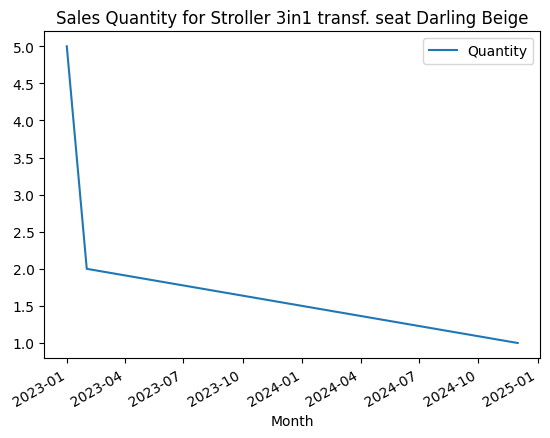

In [32]:
product_id = '31001010055'  # Replace with any SKU
df = monthly_sales[monthly_sales['Product'] == product_id]

df.plot(x='Month', y='Quantity', title=f'Sales Quantity for {df["Product Name"].iloc[0]}')

<Axes: title={'center': 'Top 5 Products by Monthly Sales'}, xlabel='Month'>

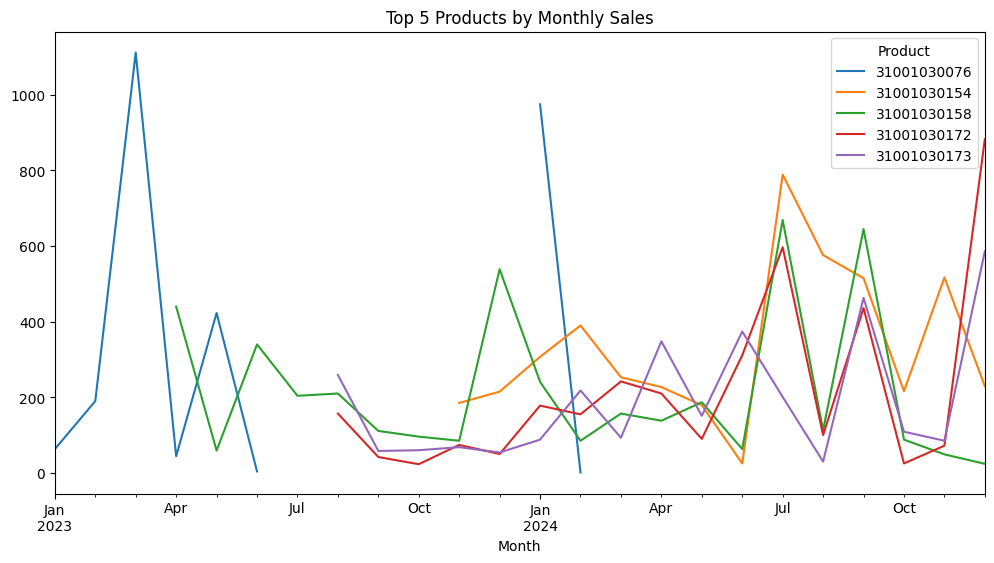

In [33]:
top_products = monthly_sales.groupby('Product')['Quantity'].sum().nlargest(5).index
top_df = monthly_sales[monthly_sales['Product'].isin(top_products)]

top_df.pivot(index='Month', columns='Product', values='Quantity').plot(title='Top 5 Products by Monthly Sales', figsize=(12, 6))


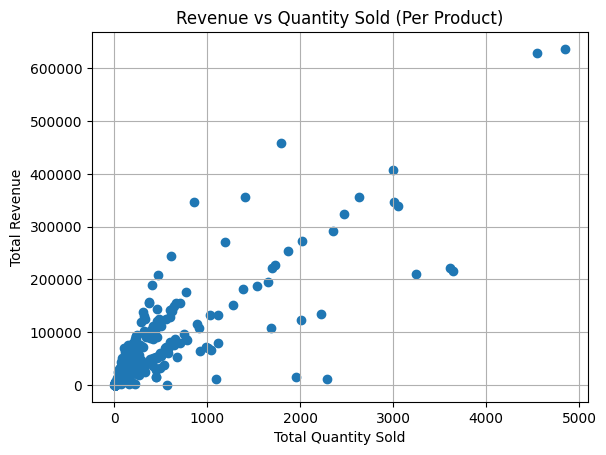

In [34]:
import matplotlib.pyplot as plt

plt.scatter(
    monthly_sales.groupby('Product')['Quantity'].sum(),
    monthly_sales.groupby('Product')['Revenue'].sum()
)
plt.xlabel('Total Quantity Sold')
plt.ylabel('Total Revenue')
plt.title('Revenue vs Quantity Sold (Per Product)')
plt.grid(True)
plt.show()


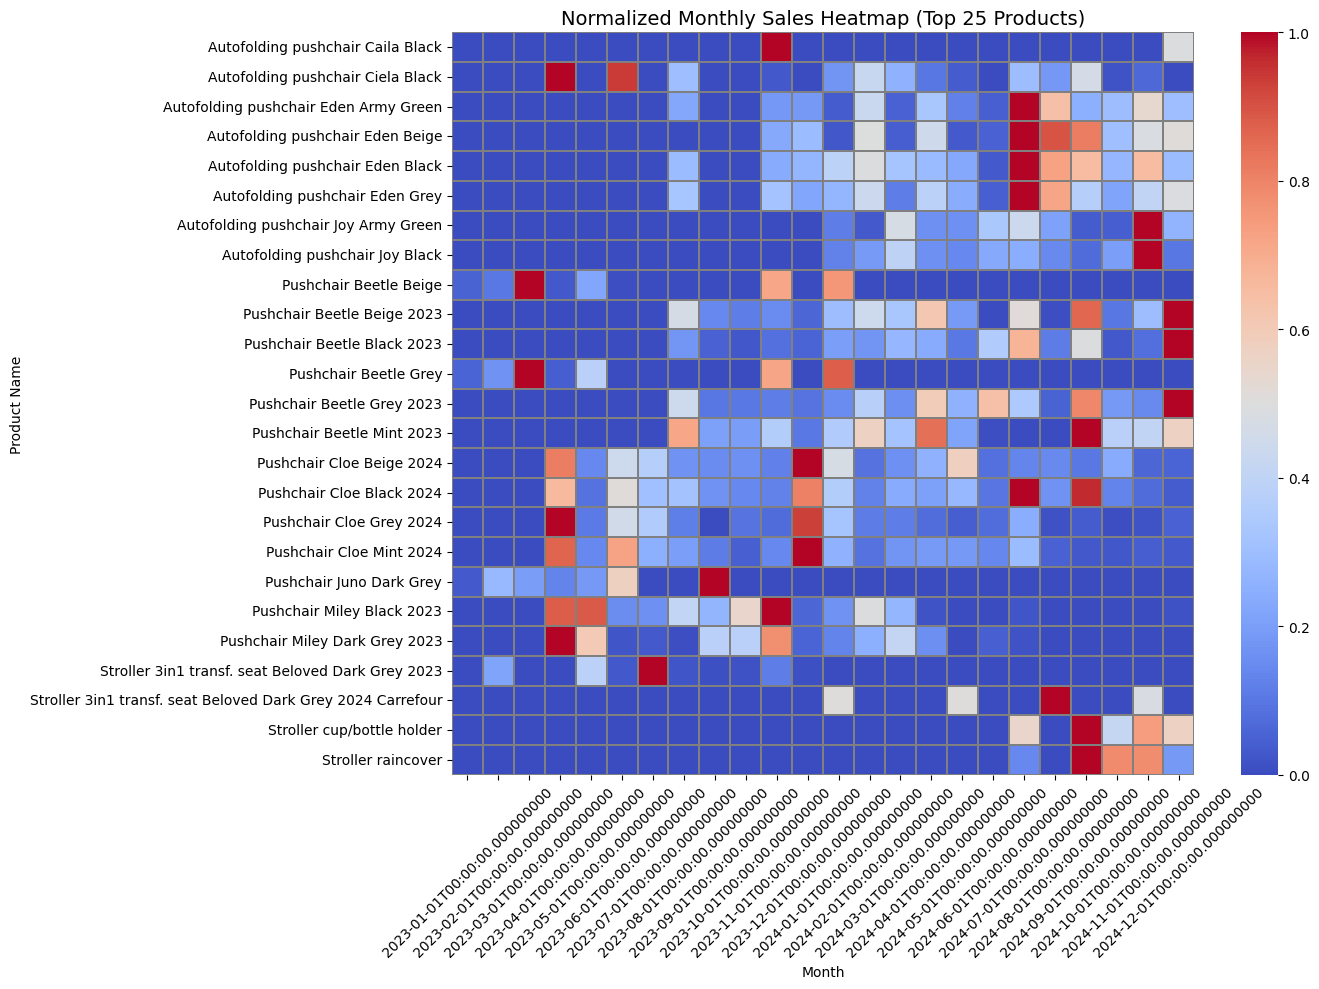

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Get top 25 products by total quantity sold
top_products = monthly_sales.groupby('Product Name')['Quantity'].sum().nlargest(25).index

# Step 2: Filter only those products
heatmap_df = monthly_sales[monthly_sales['Product Name'].isin(top_products)]

# Step 3: Pivot to get products vs months
pivot = heatmap_df.pivot_table(
    index='Product Name',
    columns='Month',
    values='Quantity',
    fill_value=0
)

# Step 4: Normalize each row so we compare **seasonality patterns**
pivot_normalized = pivot.div(pivot.max(axis=1), axis=0)

# Step 5: Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_normalized, cmap='coolwarm', linewidths=0.2, linecolor='gray')
plt.title("Normalized Monthly Sales Heatmap (Top 25 Products)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Product Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
# Step 1: Sort for lag features to work correctly
monthly_sales = monthly_sales.sort_values(['Product', 'Month'])

# Step 2: Create lag features & rolling mean
monthly_sales['Lag_1'] = monthly_sales.groupby('Product')['Quantity'].shift(1)
monthly_sales['Lag_2'] = monthly_sales.groupby('Product')['Quantity'].shift(2)
monthly_sales['Lag_3'] = monthly_sales.groupby('Product')['Quantity'].shift(3)
monthly_sales['Rolling_Mean_3'] = monthly_sales.groupby('Product')['Quantity'].shift(1).rolling(3).mean().reset_index(level=0, drop=True)

# Step 3: Add date features
monthly_sales['Month_Num'] = monthly_sales['Month'].dt.month
monthly_sales['Year'] = monthly_sales['Month'].dt.year

# Step 4: Flag if product is newly introduced (within 3 months)
first_month = monthly_sales[monthly_sales['Quantity'] > 0].groupby('Product')['Month'].min()
monthly_sales['First_Sale_Month'] = monthly_sales['Product'].map(first_month)
monthly_sales['Is_New'] = (monthly_sales['Month'] - monthly_sales['First_Sale_Month']).dt.days < 90

# Drop helper column
monthly_sales = monthly_sales.drop(columns=['First_Sale_Month'])


In [37]:
monthly_sales.head(10)

,Product,Month,Quantity,Revenue,Part Number,Product Name,Product Type,Enterprise Company,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Month_Num,Year,Is_New
0,31001010007,2024-12-01,2,623.88,31001010007,Stroller 3 in 1 Allure Lilac,Stoka,KIKA GROUP LTD,NaN,NaN,NaN,NaN,12,2024,True
1,31001010045,2024-12-01,1,250.00,31001010045,Stroller 3 in 1 Madrid Green Melange,Stoka,KIKA GROUP LTD,NaN,NaN,NaN,NaN,12,2024,True
2,31001010055,2023-01-01,5,1125.04,31001010055,Stroller 3in1 transf. seat Darling Beige,Stoka,KIKA GROUP LTD,NaN,NaN,NaN,NaN,1,2023,True
3,31001010055,2023-02-01,2,435.88,31001010055,Stroller 3in1 transf. seat Darling Beige,Stoka,KIKA GROUP LTD,5.0,NaN,NaN,NaN,2,2023,True
4,31001010055,2024-12-01,1,201.36,31001010055,Stroller 3in1 transf. seat Darling Beige,Stoka,KIKA GROUP LTD,2.0,5.0,NaN,NaN,12,2024,False
5,31001010056,2023-01-01,3,696.45,31001010056,Stroller 3in1 transf. seat Darling Light Grey,Stoka,KIKA GROUP LTD,NaN,NaN,NaN,NaN,1,2023,True
6,31001010056,2023-02-01,38,8877.28,31001010056,Stroller 3in1 transf. seat Darling Light Grey,Stoka,KIKA GROUP LTD,3.0,NaN,NaN,NaN,2,2023,True
7,31001010056,2023-03-01,65,13589.09,31001010056,Stroller 3in1 transf. seat Darling Light Grey,Stoka,KIKA GROUP LTD,38.0,3.0,NaN,NaN,3,2023,True
8,31001010056,2023-04-01,3,667.33,31001010056,Stroller 3in1 transf. seat Darling Light Grey,Stoka,KIKA GROUP LTD,65.0,38.0,3.0,35.333333,4,2023,False
9,31001010056,2023-08-01,1,217.37,31001010056,Stroller 3in1 transf. seat Darling Light Grey,Stoka,KIKA GROUP LTD,3.0,65.0,38.0,35.333333,8,2023,False


In [38]:
# Remove rows with NaN in lag or rolling features
monthly_sales_cleaned = monthly_sales.dropna(subset=['Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_3'])

In [39]:
from sklearn.model_selection import train_test_split

# Select features and target (Quantity as target)
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_3', 'Month_Num', 'Year', 'Is_New']
target = 'Quantity'

X = monthly_sales_cleaned[features]
y = monthly_sales_cleaned[target]

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 46.23433226613818, MSE: 11112.572835993888, RMSE: 105.4161886808373


In [43]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5

print(f'MAE: {mae_xgb}, MSE: {mse_xgb}, RMSE: {rmse_xgb}')
score = xgb_model.score(X_test, y_test)
print("Accuracy:", score)

MAE: 52.98776626586914, MSE: 12841.0771484375, RMSE: 113.31847664188528
Accuracy: 0.0002620816230773926


In [42]:
from sklearn.model_selection import GridSearchCV

# Set up a simple grid search for XGBoost hyperparameters
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_absolute_error', cv=3)
grid_search.fit(X_train, y_train)

# Get best parameters
score = xgb_model.score(X_test, y_test)
print("Accuracy:", score)


KeyboardInterrupt: 

In [ ]:
monthly_sales['Rolling_Mean_6'] = monthly_sales.groupby('Product')['Quantity'].shift(1).rolling(6).mean().reset_index(level=0, drop=True)

In [ ]:
missing_data = monthly_sales.isna().sum()
print(missing_data[missing_data > 0])

Lag_1              401
Lag_2              690
Lag_3              938
Rolling_Mean_3     938
Rolling_Mean_6    1542
dtype: int64


In [ ]:
monthly_sales_cleaned = monthly_sales.dropna(subset=['Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_3', 'Rolling_Mean_6'])

In [ ]:
monthly_sales_cleaned.head()

,Product,Month,Quantity,Revenue,Part Number,Product Name,Product Type,Enterprise Company,Cumulative Quantity,Lag_1,Lag_2,Lag_3,Rolling_Mean_3,Month_Num,Year,Is_New,Rolling_Mean_6
17,31001010057,2023-07-01,65,14173.59,31001010057,Stroller 3in1 transf. seat Darling Dark Grey,Stoka,KIKA GROUP LTD,443,58.0,55.0,25.0,46.000000,7,2023,False,63.000000
18,31001010057,2023-08-01,30,6565.91,31001010057,Stroller 3in1 transf. seat Darling Dark Grey,Stoka,KIKA GROUP LTD,473,65.0,58.0,55.0,59.333333,8,2023,False,61.833333
19,31001010057,2023-09-01,11,2470.96,31001010057,Stroller 3in1 transf. seat Darling Dark Grey,Stoka,KIKA GROUP LTD,484,30.0,65.0,58.0,51.000000,9,2023,False,51.500000
20,31001010057,2023-10-01,5,1098.37,31001010057,Stroller 3in1 transf. seat Darling Dark Grey,Stoka,KIKA GROUP LTD,489,11.0,30.0,65.0,35.333333,10,2023,False,40.666667
21,31001010057,2023-11-01,10,2041.00,31001010057,Stroller 3in1 transf. seat Darling Dark Grey,Stoka,KIKA GROUP LTD,499,5.0,11.0,30.0,15.333333,11,2023,False,37.333333


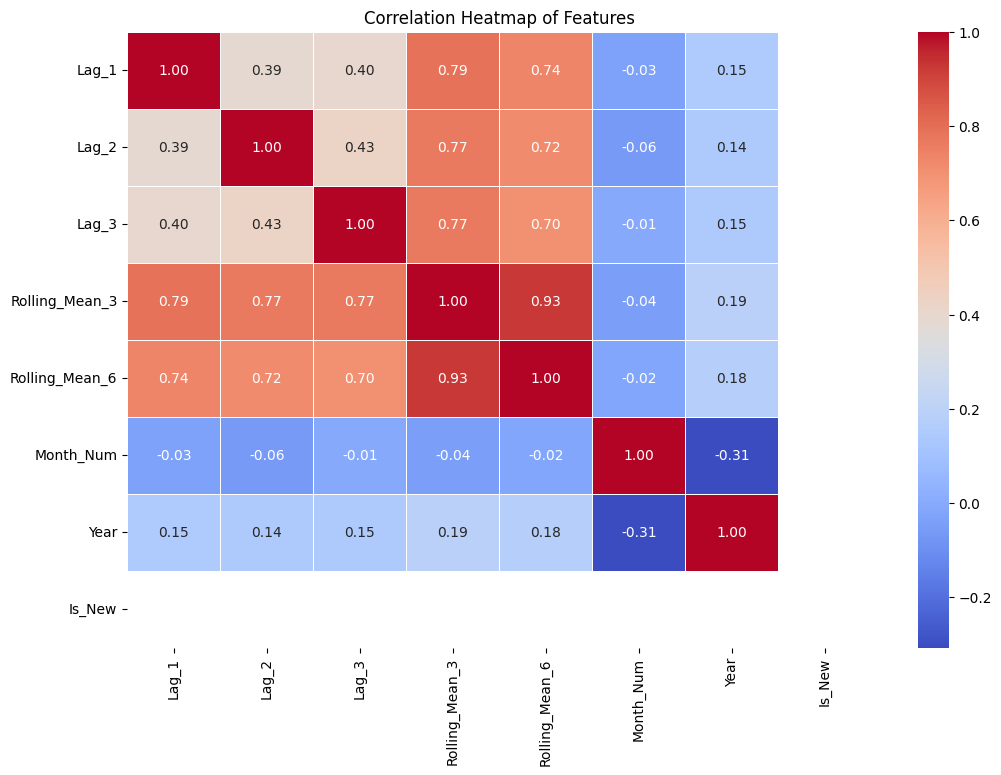

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for selected features
features = ['Lag_1', 'Lag_2', 'Lag_3', 'Rolling_Mean_3', 'Rolling_Mean_6', 'Month_Num', 'Year', 'Is_New']
corr_matrix = monthly_sales_cleaned[features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()
